In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from sklearn import datasets

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.cross_validation import train_test_split

In [7]:
from sklearn import metrics

In [8]:
from sklearn import svm

# Supervised Learning Models - Support Vector Machines (SVM) Algorithms

This project will be practice defining decision boundaries using Support Vector Machines. SVM are used to find an area of equal separation between classes of data (i.e. - finding the hyperplane/optimal line between classes), but having that work be carried out in a way that reduces the risk of introducing errors into the process of classifying the data. That’s probably an oversimplification. I’m learning - that’s the gist I get of it so far. 

After the separation based on an optimal margin distance, classes into two groups, SVC can be used to perform the one-vs-one method and LinearSVC for multi-class reduction via the  one-vs-all method. [This page](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py) inspires the work done in this project.

-----

To start, the Iris dataset will be loaded.

In [9]:
iris = datasets.load_iris()

In [10]:
X = iris.data  # Features

In [11]:
Y = iris.target  # Target

In [12]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  


-----

Below, a model will be made. 

In [13]:
model = SVC()

Next, the data will be split into a training set and a testing set for training the model later. This will be done by taking the features (X) and the target (Y - the flower class each belong to) and splitting the data into a training set (Xtrain, YTrain) and then a testing set (XTest, YTest). Those four objects will be created and made ready for later use with the testing data size being set to 30%.

In [14]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.3, random_state = 3)

Below, the model will be fit using the training data (using the feature “XTrain”) and it will be given the target “YTrain”).

In [15]:
model.fit(XTrain, YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The model fit will be tested below using training data as a way to see how well it predicts the testing data. To do that, an object called “predicted” will be made and it will be set equal to model.predict() with the “XTest” data passed through it. And the expected results will the “YTest” data (considering that was the split that was done earlier). 

In [16]:
predicted = model.predict(XTest)

expected = YTest

To see how high the accuracy was, the accuracy score will be called from the scikit-learn metrics library. Specifically, “metrics” then “accuracy_score” will be passed to compare the expected results to the predicted results.

In [17]:
print (metrics.accuracy_score(expected,predicted))  # Checking the accuracy score.

0.977777777778


The results tend to vary depending on the randomness of the selection for train_test_split.

---------

It would be interesting to explore different kinds of kernel types that can be used for classification. To do this, the boundaries created by a few kernel types will be plotted. The methods will be explored by making two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd degree) kernel fit. That will happen a bit later.

To reproduce something similar to the plots in the documentation, not all of the data will be used. So below, “X” will be set equal to “iris.data” and the first two features will be selected. 


In [18]:
X = iris.data[:, :2]

Below, the “Y” (which serves as the target), will continue to have that same purpose by being set as “iris.target”.

In [19]:
Y = iris.target

An SVM regularization parameter will be passed next. That will be “C = 1.0”. The reason for doing this is so that there can be regularization between all of the different kernel methods that are going to be used. It will help to allow for a more accurate comparison. 

In [20]:
C = 1.0

Next, “svc” will be set as an object. And to have it be the svc model, “svm.SVC” will be called”. Since this will be a linear model, the kernel will explicitly be set to “linear” and the regularization parameter will be "C = C". The model will then be fit using “X” and “Y” (serving basically to combine the creation of the model with fitting the model).

In [21]:
svc = svm.SVC(kernel = "linear", C = C).fit(X, Y)

A Gaussian Radial Basis Function (or RBF) function will be carried out next. The kernel will be specified to equal "rbf") and a repeat of the simultaneous creation of and fitting of a model will be carried out as well.

In [22]:
rbfSvc = svm.SVC(kernel = "rbf", gamma = 0.7, C = C).fit(X, Y)

Next, a third degree polynomial fit will be made named “polySvc”. That will be set equal to “svm.SVC” and the kernel will be set to “poly”. 

In [23]:
polySvc = svm.SVC(kernel = "poly", degree = 3, C = C).fit(X, Y)

Below will be the creation of another linear model. This one will be named “linSvc”.


In [24]:
linSvc = svm.LinearSVC(C = C).fit(X, Y)

The process of setting up the visual plots [seen in the scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py) will begin below. A mesh will be defined to plot in. And the maximum and minimum of the plot for the “X” and “Y” axises will be defined based on the smallest and largest features in the dataset. Then, Numpy’s built-in mesh grid method will be used to construct the plot. 

To start, the step size will be defined as “h = 0.02” for the mesh grid because, from the scikit-learn documentation, that seems to be a good fit. Then, to set up the X axis minimum and maximum, xMin will be set equal to the minimum feature in that first feature column minus 1. And then, similarly, for the maximum, the xMax will be set equal to the maximum feature in that first feature column, but plus 1. The process will be the same for the Y axis, except it will be performed on the next column over.

In [25]:
h = 0.02

xMin = X[:, 0].min() - 1
xMax = X[:, 0].max() + 1

In [26]:
yMin = X[:, 1].min() - 1
yMax = X[:, 1].max() + 1

Numpy can create a mesh grid for replicating the plots in the documentation. To start that below, two objects will be created called xx and yy and they will be set equal to calling Numpy.meshgrid ("np.meshgrid"). Numpy.arange will be used to pass the x points, then the y points. What specifically will be done is the indication that things will be arranged from x minimum to x maximum, and then step size should be the one that was set earlier (which was 0.02). The details for y will be a repeat of those instructions.


In [27]:
xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))

Titles for each plot will be set next by creating a list of plot titles. Following that will come the creation of a for loop that will simply keep drawing from those titles in the list.

In [28]:
titles = ["SVC with Linear Kernel",
          "LinearSVC (Linear Kernel)",
          "SVC with RBF Kernel",
          "SVC with Polynomial (Degree 3) Kernel"]

A for loop will be created below for creating the four plots from the documentation. 

The for loop will go through each model, set its position as a subplot, then scatter the data points and draw a contour of those decision boundaries. 

Enumerate will be used to set up something almost like a count for keeping track of everything throughout the for loop and the items will be passed as a tuple. 

Then the figure size (8 by 8) will be set for each of the model as the for loop is iterated through.

The subplot will be set to 2 by 2 (with the last argument passed being its location, which will be its enumeration count plus 1). However, the subplot of 2 by 2 is not rendering properly. The Jupyter notebook is actually plotting the mesh grids as a 4 by 1 instead of a 2 by 2, yet it does not seem due to space constraints. 

Next, “Z” will be defined as the prediction. And, using ravel and Numpy.c\_ which "[translates the slice objects into a concatenation along the second axis](http://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html)", the predictions will be formatted in a way that will allow them to be used effectively for the contour line plot.

The result will be put into a colorplot by setting Z = Z.reshape determined by that xx mesh. 

"contourf." will be called for a filled contourplot and mesh points ( xx and yy - mesh points, Z - the contour lines that were just made) will be passed and then a colormap will be called with half transparency (set to half to help with visibility). 

A scatterplot will be made of the training points themselves. That will be that first column in the training set (or row, depending on how the formats actually are), followed by second set of data features, and then the setting of a line color and the colormap choice.

The remainder are all customization tidbits (labels, limits, ticks). The title of each of the individual subplots will be equal to their positions in the list as the for loop goes through the list.

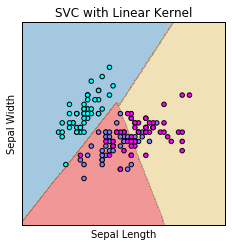

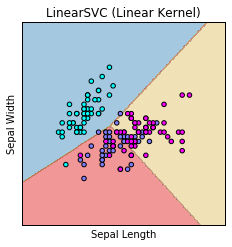

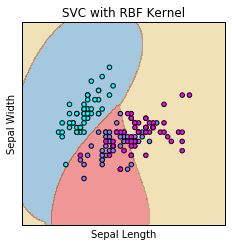

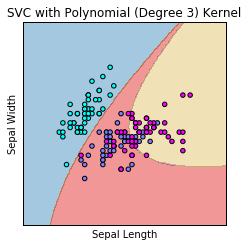

In [29]:
for i, clf in enumerate((svc, linSvc, rbfSvc, polySvc)):
    
    plt.figure(figsize = (8, 8))
    
    plt.subplot(2, 2, i+1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.5)
    
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.cool)
    
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])